# S-R Trend Analysis with CovsirPhy

In [1]:
# imports 
import covsirphy as cs

C:\Users\lukas\anaconda3\envs\Intro_to_Data_Science\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# loading the data -> stored in kaggle/input
# data will be downloaded if existing files are older than 24h
data_loader = cs.DataLoader(directory="kaggle/input")

# The number of cases and population values in jhu format
jhu_data = data_loader.jhu()

Retrieving COVID-19 dataset in Japan from https://github.com/lisphilar/covid19-sir/data/japan
Retrieving datasets from COVID-19 Data Hub https://covid19datahub.io/
	Please set verbose=2 to see the detailed citation list.
Retrieving datasets from Our World In Data https://github.com/owid/covid-19-data/
Retrieving datasets from COVID-19 Open Data by Google Cloud Platform https://github.com/GoogleCloudPlatform/covid-19-open-data


In [19]:
# scenario generation
snl = cs.Scenario(country="Switzerland", province=None)
snl.register(jhu_data)

# time period definition
snl.timepoints(first_date="2020-09-01", last_date="2020-12-01", today="2020-12-01")

In [13]:
# calculation of the recovery period over all countries
recovery_period = jhu_data.calculate_recovery_period()
print(f"Average recovery period: {recovery_period} [days]")

Average recovery period: 15 [days]


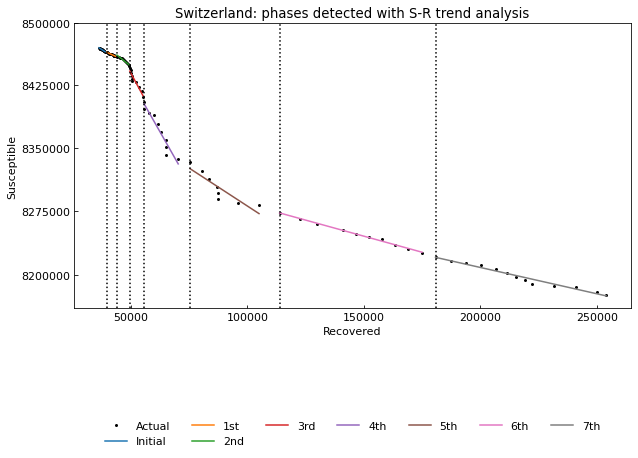

In [14]:
# phase detection
_ = snl.trend()

In [15]:
# Parameter estimation of the defined model
# Default value of timeout is 180 sec
snl.estimate(cs.SIRD)


<SIR-D model: parameter estimation>
Running optimization with 8 CPUs...
Completed optimization. Total: 0 min 22 sec


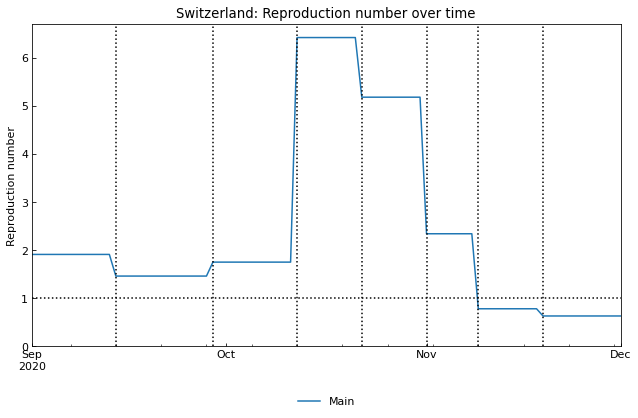

In [16]:
# R-value over the defined time period
_ = snl.history(target="Rt", )

In [17]:
snl.summary()

,Type,Start,End,Population,ODE,Rt,kappa,rho,sigma,1/alpha2 [day],tau,1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,01Sep2020,13Sep2020,8513227,SIR-D,1.91,0.000315,0.065917,0.034242,3175,1440,15,29,0.015640,79,0 min 2 sec
1st,Past,14Sep2020,28Sep2020,8513227,SIR-D,1.46,0.000219,0.048745,0.033280,4565,1440,20,30,0.020488,79,0 min 2 sec
2nd,Past,29Sep2020,11Oct2020,8513227,SIR-D,1.75,0.000242,0.090048,0.051116,4133,1440,11,19,0.061633,357,0 min 9 sec
3rd,Past,12Oct2020,21Oct2020,8513227,SIR-D,6.42,0.000366,0.136183,0.020856,2735,1440,7,47,0.027700,40,0 min 1 sec
4th,Past,22Oct2020,31Oct2020,8513227,SIR-D,5.18,0.000472,0.106714,0.020135,2118,1440,9,49,0.021276,368,0 min 9 sec
5th,Past,01Nov2020,08Nov2020,8513227,SIR-D,2.34,0.000688,0.073594,0.030807,1453,1440,13,32,0.032669,543,0 min 13 sec
6th,Past,09Nov2020,18Nov2020,8513227,SIR-D,0.78,0.000789,0.049228,0.062572,1267,1440,20,15,0.011865,411,0 min 10 sec
7th,Past,19Nov2020,01Dec2020,8513227,SIR-D,0.63,0.000909,0.039465,0.061637,1099,1440,25,16,0.024014,584,0 min 14 sec


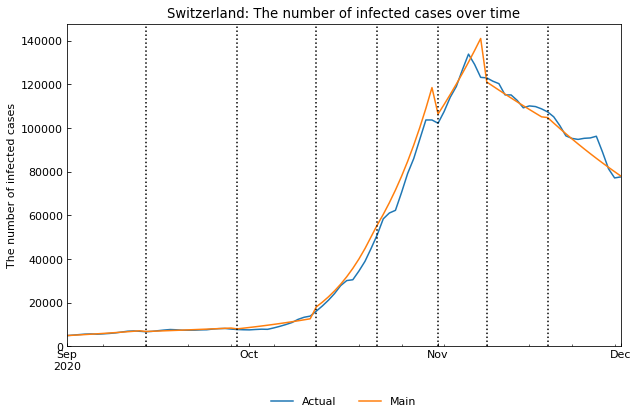

In [18]:
snl.history("Infected");